# 데이터셋 및 패키지, 라이브러리 다운로드

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.datasets import load_breast_cancer #Loading the full DataSet From Sklearn Library

# Breast cancer dataset
cancer = load_breast_cancer()
(X_canc, y_canc) = load_breast_cancer(return_X_y = True)

# 함수 실행

In [9]:
# 레이블 지정된 산점도 그리는 함수
def plot_labelled_scatter(X, y, class_labels,s):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure(figsize=s)
    
    plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.4, edgecolor='black', lw = 1)
    sp = plt.gca().spines
    sp['top'].set_visible(False)
    sp['right'].set_visible(False)
    
    plt.grid(which='both',color='lightslategrey',alpha=0.3)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h,fontsize=15,frameon=False)

# 차원축소


차원 축소 알고리즘은 비지도 학습 방법 중 하나로 변환에 속한다. 변환은 200개의 피처를 포함한 원본 데이터셋을 가져와 약 10차원만 사용하는 대략적인 버전을 생성한다. 차원 축소는 처음 데이터셋을 탐색할 때 발생한다. 차원 축소를 통해 샘플들이 어떻게 그룹화되거나 서로 연관되어 있는지를 2차원 산점도 시각화를 통해 이해할 수 있다.

# 간단한 차원 축소 알고리즘 및 메소드
- PCA
- MDS
- t-SNE

# 1.PCA(주성분 분석)
PCA란 : 원본 데이터의 cloud를 찾아 회전 > 차원들이 통계적으로 상관성이 없어짐 > 변동성을 나타내는 초기 차원 제외하고 나머지 차원 제거 >> 데이터의 주요 패턴을 유지하면서 차원을 줄여 시각화나 분석을 용이하게 한다.
수학적 설명 : 실수 공간에서 점들의 모음에 대한 주성분은 방향 벡터들의 순서로 정의된다. 이때 각 벡터는 데이터를 가장 잘 맞는 직선의 방향이며, 이전 벡터들에 대해 직교한다.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
#This can be done by using StandardScaler of sklearn Library
canc_norm = StandardScaler().fit(X_canc).transform(X_canc)  

pca = PCA(n_components = 2).fit(canc_norm) #Fitting PCA with 2 Components

canc_pca = pca.transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before PCA : {}\n\nNumber of Features in Breast Cancer DataSet After PCA : {}'
      .format(X_canc.shape[1],canc_pca.shape[1]))

Number of Features in Breat Cancer DataSet Before PCA : 30

Number of Features in Breast Cancer DataSet After PCA : 2


# Breast Cancer Dataset의 PCA 변환 시각화
: 데이터셋의 피처가 2개로 줄어들었으며 일부 정보가 손실되지만, 피처 간의 관계를 더 잘 이해할 수 있다. 또한 2개의 피처만 남기 때문에 시각화가 훨씬 용이해진다.

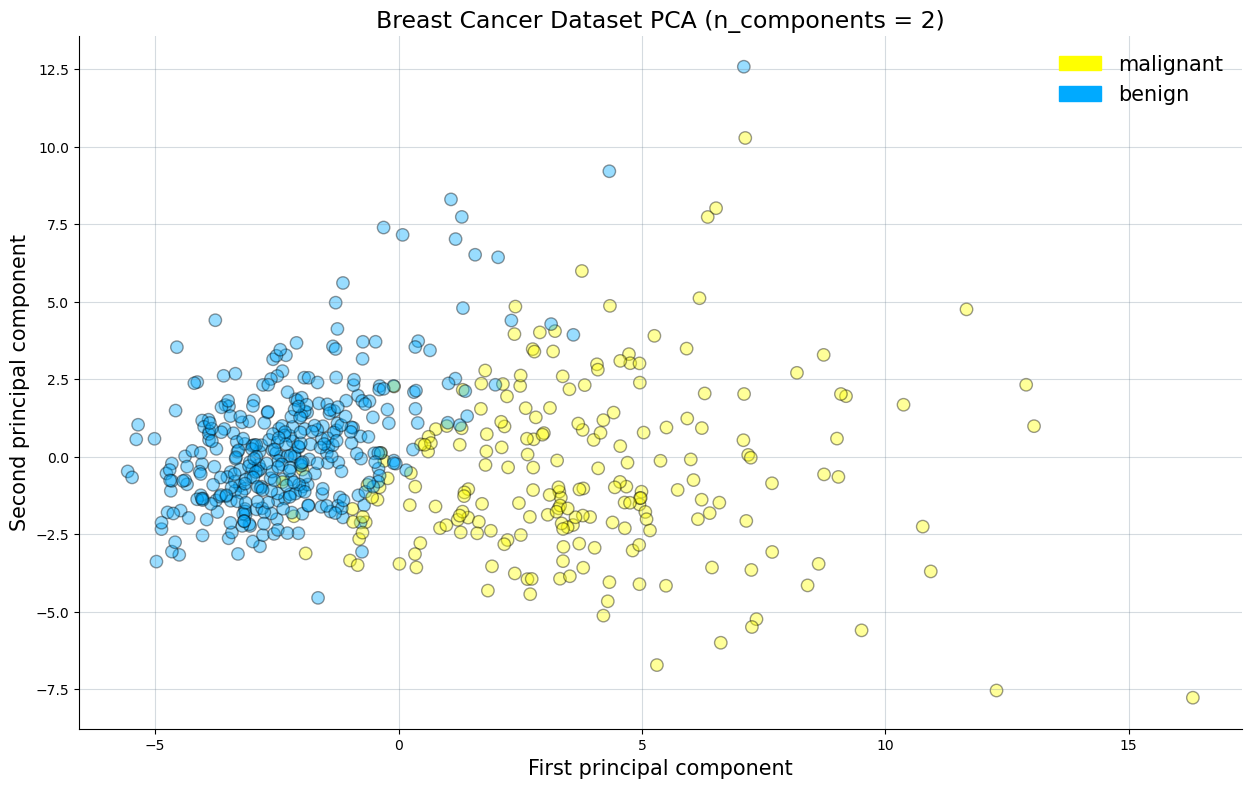

In [13]:
plot_labelled_scatter(canc_pca, y_canc, ['malignant', 'benign'],(15,9)) #Using the Helper Function

#Labelling
plt.xlabel('First principal component',fontsize=15)
plt.ylabel('Second principal component',fontsize=15)
plt.title('Breast Cancer Dataset PCA (n_components = 2)',fontsize=17);

# PCA로 초기 30개의 피처간의 상관관계 확인
: PCA의 .components_ 속성을 제공하며, 이 속성에는 PCA 객체를 학습하는 동안 생성된 고변동성 및 저변동성 피처쌍간의 상관관계 값이 저장된다.이 상관관계 값을 활용해 Heatmap(히트맵)으로 활용되고 시각화된다.

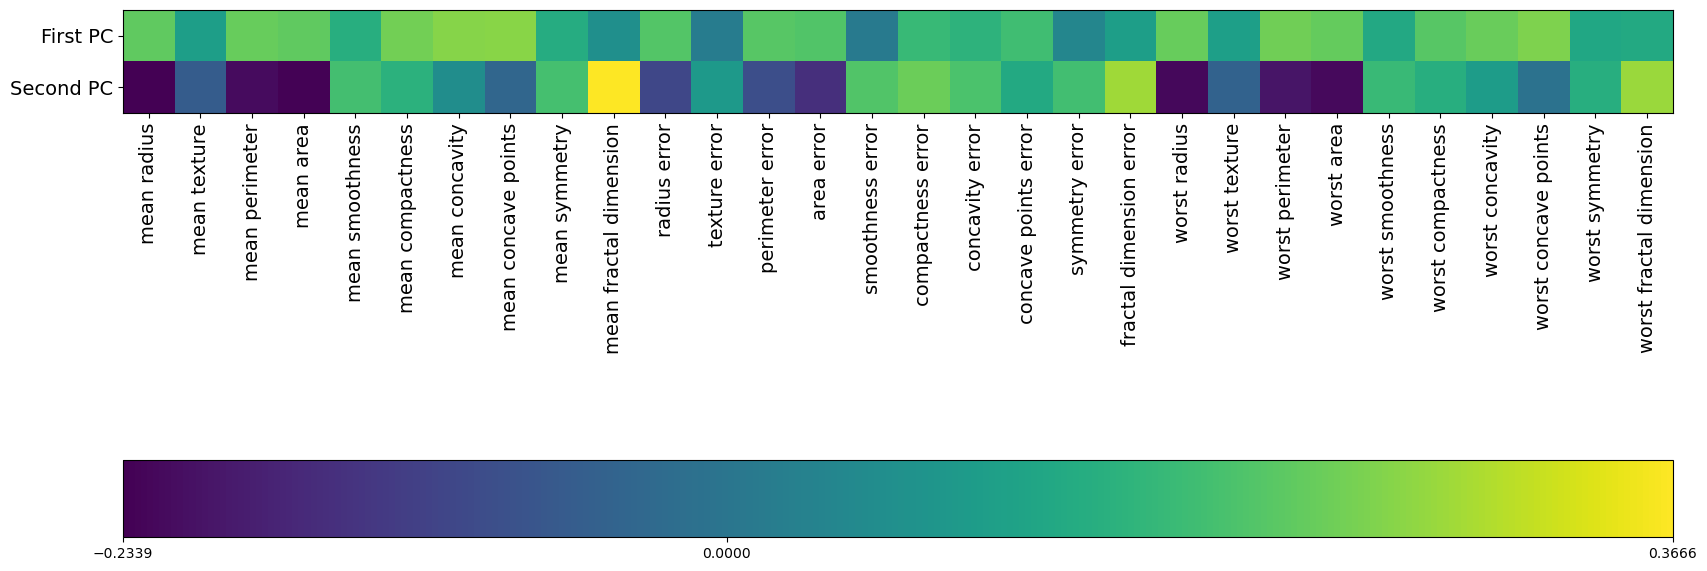

In [17]:
fig = plt.figure(figsize=(20,9))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'viridis')
feature_names = list(cancer.feature_names)

plt.gca().set_xticks(np.arange(len(feature_names)));
plt.gca().set_yticks(np.arange(2));
plt.gca().set_xticklabels(feature_names, rotation=90, fontsize=14);
plt.gca().set_yticklabels(['First PC', 'Second PC'], fontsize=14);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.5);

첫 번째 주성분(PC1): 모든 값이 양수> 모든 30개의 피처간에 일반적인 상관관계가 있다.

두 번째 주성분(PC2): 양수와 음수가 섞임 > 음수로 표시된 피처들은 서로 같은 방향으로 변화&나머지와 반대로

# 2.MDS(다차원 축소)

:고차원 공간에서 낮은 차원 하위 집합을 찾는 문제를 다루며, 주로 시각화에 유용. PCA보다 더 정교한 차원을 다루는 것에 유용하다. 

# MDS의 종류
: 종류가 다양하지만 공통된 목표를 갖는다. 고차원 데이터셋을 낮은 차원 공간(보통 2차원 평면)에 투영하여, 원본 데이터 공간에서 점들이 얼마나 서로 가까운지에 대한 정보를 최대한 보존하면서 시각화하는 것 >> 고차원 데이터에서 클러스터링 행동을 찾아내 시각화 가능

Number of Features in Breat Cancer DataSet Before MDS : 30

Number of Features in Breast Cancer DataSet After MDS : 2


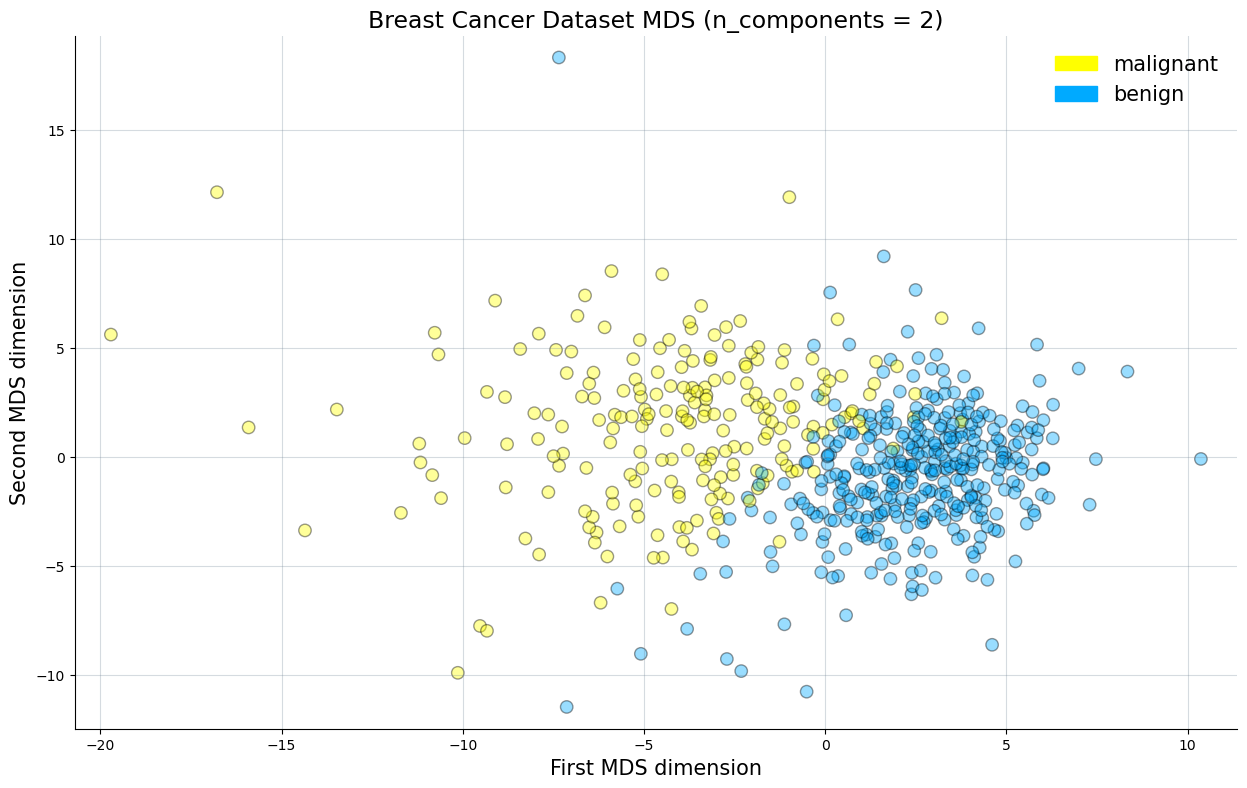

In [19]:
from sklearn.manifold import MDS

mds = MDS(n_components = 2,random_state = 2)

canc_mds = mds.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before MDS : {}\n\nNumber of Features in Breast Cancer DataSet After MDS : {}'
      .format(X_canc.shape[1],canc_mds.shape[1]))

plot_labelled_scatter(canc_mds, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First MDS dimension',fontsize=15)
plt.ylabel('Second MDS dimension',fontsize=15)
plt.title('Breast Cancer Dataset MDS (n_components = 2)',fontsize=17);

MDS에서 주목할점
: MDS는 PCA와 비슷한 작업을 수행(고차원 데이터 > 저차원 데이터) but MDS와 PCA의 분포에 차이 존재 >> 두 알고리즘이 서로 다른 원리와 수학적 모델을 사용해서(계산 방식 및 데이터를 처리하는 방식)

# 3. t-SNE

: 시각화에 매우 강력한 학습체 알고리즘. 
: 원본 고차원 데이터셋에서 점들 간의 거리를 최대한 보존하여 2차원 산점도에서 데이터를 표현 >> 더 많은 가중치 부여 for 이웃점들과의 거리 보존

Number of Features in Breat Cancer DataSet Before T-SNE : 30

Number of Features in Breast Cancer DataSet After T-SNE : 2


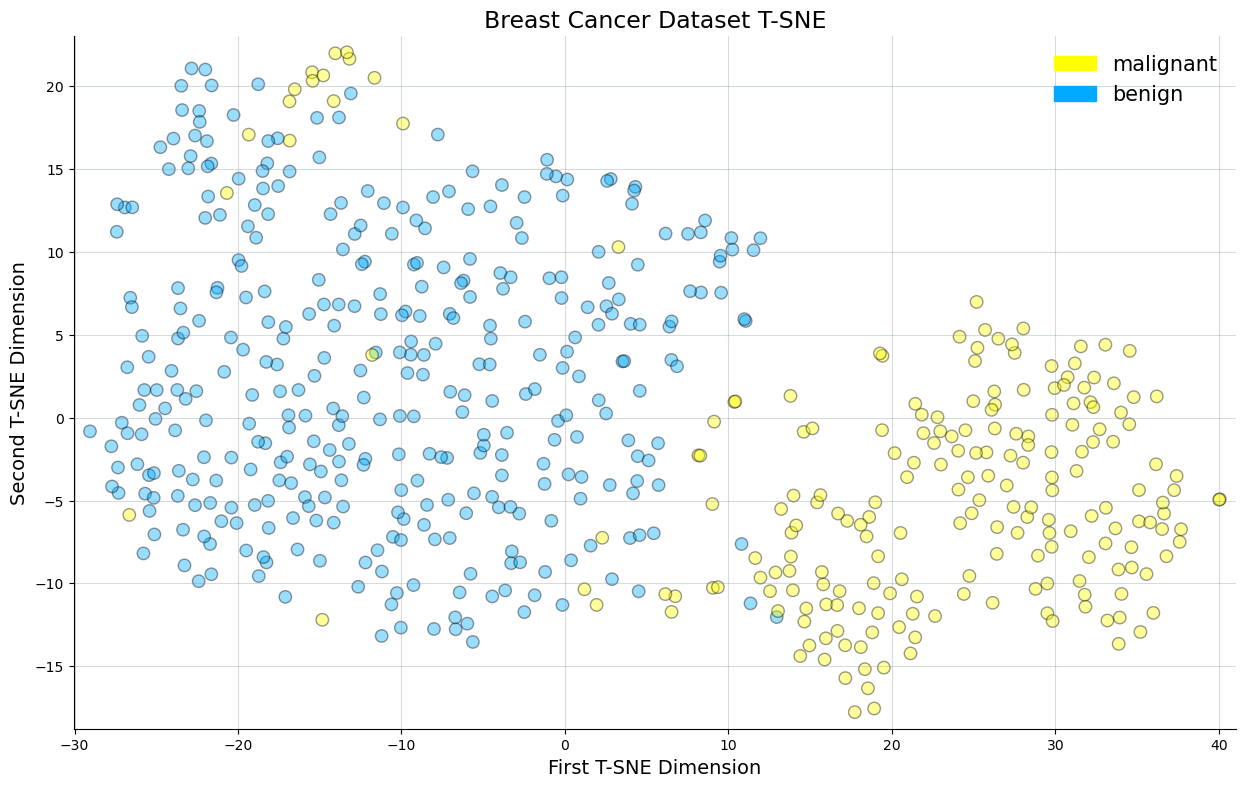

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state = 42)

canc_tsne = tsne.fit_transform(canc_norm)

print('Number of Features in Breat Cancer DataSet Before T-SNE : {}\n\nNumber of Features in Breast Cancer DataSet After T-SNE : {}'
      .format(X_canc.shape[1],canc_tsne.shape[1]))

plot_labelled_scatter(canc_tsne, y_canc, ['malignant', 'benign'],(15,9))

plt.xlabel('First T-SNE Dimension',fontsize=14)
plt.ylabel('Second T-SNE Dimension',fontsize=14)
plt.title('Breast Cancer Dataset T-SNE',fontsize=17);

t-SNE에서 주목할 점
: Breast Cancer Dataset에서도 구조를 잘 찾음 >> t-SNE는 이웃 간의 관계가 뚜렷하게 정의된 패턴이 있을 때 더 효과적으로 구조를 파악하고 시각화함.